## Week 3 Class activities
This notebook is a starting point for the exercises and activities that we'll do in class.

Before you attempt any of these activities, make sure to watch the video lectures for this week.

### Joining tables
Let's look at the spatial distribution of vaccine hesitancy, early in the pandemic.

The CDC has a dataset at the county level, [available via Socrata](https://data.cdc.gov/Vaccinations/Vaccine-Hesitancy-for-COVID-19-County-and-local-es/q9mh-h2tw).


<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Import the vaccine hesitancy dataset into a dataframe. Call it <strong>hesitancy</strong>.
</div>

*Hint*: Use the same approach as for the Seattle permits (class 2) or the Los Angeles housing (lecture 5). Just use a different URL.

*Hint*: Add the `limit` keyword at the end of the URL to get more than 1000 rows. [See the example here](https://github.com/socrata/discuss/issues/145). There are 3,142 rows, according to the dataset's webpage, so you will be safe if you specify a limit of (say) 5000 rows.

In [1]:
# your code here

import json
import pandas as pd
import requests


requestString = 'https://data.cdc.gov/resource/q9mh-h2tw.json?$limit=500'
r = requests.get(requestString)
d = json.loads(r.text)
df = pd.DataFrame(d)
df

,fips_code,county_name,state,estimated_hesitant,estimated_hesitant_or_unsure,estimated_strongly_hesitant,social_vulnerability_index,svi_category,ability_to_handle_a_covid,cvac_category,...,percent_non_hispanic_asian,percent_non_hispanic_black,percent_non_hispanic_native,percent_non_hispanic_white,geographical_point,state_code,county_boundary,state_boundary,:@computed_region_hjsp_umg2,:@computed_region_skr5_azej
0,1123,"Tallapoosa County, Alabama",ALABAMA,0.1806,0.24,0.1383,0.89,Very High Vulnerability,0.64,High Concern,...,0.0036,0.2697,0,0.6887,"{'type': 'Point', 'coordinates': [-86.844516, ...",AL,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",29,94
1,1121,"Talladega County, Alabama",ALABAMA,0.1783,0.235,0.1368,0.87,Very High Vulnerability,0.84,Very High Concern,...,0.0061,0.3237,0.0003,0.6263,"{'type': 'Point', 'coordinates': [-86.844516, ...",AL,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",29,94
2,1131,"Wilcox County, Alabama",ALABAMA,0.1735,0.2357,0.1337,0.93,Very High Vulnerability,0.94,Very High Concern,...,0.0003,0.6938,0,0.2684,"{'type': 'Point', 'coordinates': [-86.844516, ...",AL,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",29,94
3,1129,"Washington County, Alabama",ALABAMA,0.1735,0.2357,0.1337,0.73,High Vulnerability,0.82,Very High Concern,...,0.0025,0.2354,0,0.6495,"{'type': 'Point', 'coordinates': [-86.844516, ...",AL,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",29,94
4,1133,"Winston County, Alabama",ALABAMA,0.1805,0.2313,0.1379,0.7,High Vulnerability,0.8,High Concern,...,0.0016,0.0073,0.0005,0.937,"{'type': 'Point', 'coordinates': [-86.844516, ...",AL,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",29,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,6061,"Placer County, California",CALIFORNIA,0.0581,0.0843,0.0289,0.15,Very Low Vulnerability,0.35,Low Concern,...,0.0741,0.0165,0.0015,0.7266,"{'type': 'Point', 'coordinates': [-119.662127,...",CA,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...","{'type': 'MultiPolygon', 'coordinates': [[[[-1...",8,1196
496,5109,"Pike County, Arkansas",ARKANSAS,0.2112,0.2589,0.1377,0.71,High Vulnerability,0.76,High Concern,...,0.0043,0.0408,0,0.8737,"{'type': 'Point', 'coordinates': [-92.439162, ...",AR,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...","{'type': 'MultiPolygon', 'coordinates': [[[[-9...",15,998
497,8063,"Kit Carson County, Colorado",COLORADO,0.0945,0.1484,0.0582,0.52,Moderate Vulnerability,0.62,High Concern,...,0.0019,0.025,0.0026,0.7696,"{'type': 'Point', 'coordinates': [-105.547832,...",CO,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...","{'type': 'MultiPolygon', 'coordinates': [[[[-1...",9,1062
498,5139,"Union County, Arkansas",ARKANSAS,0.1967,0.2479,0.1296,0.81,Very High Vulnerability,0.54,Moderate Concern,...,0.0065,0.3266,0,0.6052,"{'type': 'Point', 'coordinates': [-92.439162, ...",AR,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...","{'type': 'MultiPolygon', 'coordinates': [[[[-9...",15,998


Before we do any joins, let's look at some state-level summary statistics.

<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Create a dataframe with the means of estimated_hesitant and the vaccination rate.
</div>

*Hints*:
- It might make more sense to weight each county by population, but let's not worry about that here.
- The `percent_adults_fully` columm gives the vaccination rate (as of June 2021)
- Use `groupby`!
- Before you do any operations, you might need to convert the data type of the column. I recommend creating a new column, e.g. `df['newcol'] = df.oldcol.astype(float)`

In [4]:
# your code here
pd.set_option('display.max_columns', None)
df['float_percent_adults_fully'] = df.percent_adults_fully.astype(float)
df['float_estimated_hesitant'] = df.estimated_hesitant.astype(float)

df.head()

,fips_code,county_name,state,estimated_hesitant,estimated_hesitant_or_unsure,estimated_strongly_hesitant,social_vulnerability_index,svi_category,ability_to_handle_a_covid,cvac_category,percent_adults_fully,percent_hispanic,percent_non_hispanic_american,percent_non_hispanic_asian,percent_non_hispanic_black,percent_non_hispanic_native,percent_non_hispanic_white,geographical_point,state_code,county_boundary,state_boundary,:@computed_region_hjsp_umg2,:@computed_region_skr5_azej,float_percent_adults_fully,float_estimated_hesitant
0,1123,"Tallapoosa County, Alabama",ALABAMA,0.1806,0.24,0.1383,0.89,Very High Vulnerability,0.64,High Concern,0.305,0.0242,0.0022,0.0036,0.2697,0,0.6887,"{'type': 'Point', 'coordinates': [-86.844516, ...",AL,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",29,94,0.305,0.1806
1,1121,"Talladega County, Alabama",ALABAMA,0.1783,0.235,0.1368,0.87,Very High Vulnerability,0.84,Very High Concern,0.265,0.0229,0.0043,0.0061,0.3237,0.0003,0.6263,"{'type': 'Point', 'coordinates': [-86.844516, ...",AL,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",29,94,0.265,0.1783
2,1131,"Wilcox County, Alabama",ALABAMA,0.1735,0.2357,0.1337,0.93,Very High Vulnerability,0.94,Very High Concern,0.394,0.0053,0.0009,0.0003,0.6938,0,0.2684,"{'type': 'Point', 'coordinates': [-86.844516, ...",AL,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",29,94,0.394,0.1735
3,1129,"Washington County, Alabama",ALABAMA,0.1735,0.2357,0.1337,0.73,High Vulnerability,0.82,Very High Concern,0.308,0.0146,0.0731,0.0025,0.2354,0,0.6495,"{'type': 'Point', 'coordinates': [-86.844516, ...",AL,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",29,94,0.308,0.1735
4,1133,"Winston County, Alabama",ALABAMA,0.1805,0.2313,0.1379,0.7,High Vulnerability,0.8,High Concern,0.163,0.0315,0.0034,0.0016,0.0073,0.0005,0.937,"{'type': 'Point', 'coordinates': [-86.844516, ...",AL,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",29,94,0.163,0.1805


In [5]:
df[['state','float_estimated_hesitant','float_percent_adults_fully']]

,state,float_estimated_hesitant,float_percent_adults_fully
0,ALABAMA,0.1806,0.305
1,ALABAMA,0.1783,0.265
2,ALABAMA,0.1735,0.394
3,ALABAMA,0.1735,0.308
4,ALABAMA,0.1805,0.163
...,...,...,...
495,CALIFORNIA,0.0581,0.560
496,ARKANSAS,0.2112,0.301
497,COLORADO,0.0945,0.237
498,ARKANSAS,0.1967,0.361


In [8]:
df.groupby('state')[['float_estimated_hesitant','float_percent_adults_fully']].mean()

,float_estimated_hesitant,float_percent_adults_fully
state,,
ALABAMA,0.173507,0.320851
ALASKA,0.217386,0.582296
ARIZONA,0.159240,0.504733
ARKANSAS,0.211746,0.337761
CALIFORNIA,0.071212,0.513158
COLORADO,0.076263,0.341947
GEORGIA,0.164125,0.119563
HAWAII,0.058500,NaN
KENTUCKY,0.193667,0.412000


In [9]:
df.index

RangeIndex(start=0, stop=500, step=1)

<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Create a scatter plot of hesitancy vs vaccination rates.
</div>

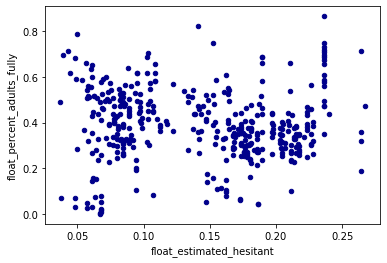

In [10]:
# your code here
ax1 = df.plot.scatter(x='float_estimated_hesitant',
                      y='float_percent_adults_fully',
                       c='DarkBlue')

## Joining
Now let's do a join.
It looks like the county boundaries are in our original dataframe, but in a weird format. We could try and parse them. But instead, let's get the county boundaries and total population using `cenpy`. 

We'll just do one state, in order to reduce the sizes of the files for this exercise.

<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Get a geodataframe of the county boundaries and population totals for a state of your choice, using cenpy.
</div>

*Hints*: 
* The `from_state`, rather than `from_county` will be helpful. See the [docs](http://cenpy-devs.github.io/cenpy/generated/cenpy.products.ACS.from_state.html). 
* You'll need to specify the state (e.g. "California") and the level (use "county").
* A small state will download faster!
* The population variable is B01001_001E

In [ ]:
import cenpy
acs = cenpy.products.ACS()
censusDf = 999 # replace with your code

censusDf.head()

You should have a `GEOID` column in your `censusDf`, as well as a geometry column.


<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Join the covid dataframe to your census dataframe.</div>

*Hints:*:
* Look at which column gives the county FIPS code in each dataframe.
* Do the data types match? Anything else you need to clean up before joining?
* It might be helpful to do a left join from the census dataframe. That means that you will automatically drop the data for counties in other states.

In [ ]:
# your code here

<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Create some county-level maps and other simple analyses.
</div>

The [geopandas documentation](https://geopandas.org/en/stable/docs/user_guide/mapping.html) has some useful tips.

Hint: make sure your column is numeric before you plot it!

In [ ]:
# your code here

<div class="alert alert-block alert-info">
<h3>What you should have learned</h3>
<ul>
  <li>Gain more practice with the APIs</li>
  <li>Understand basic data cleaning operations, such as converting strings to numeric fields.</li>
  <li>Understand how to compute group-level means and other summary statistics.</li>
    <li>Understand how to join tables on a common column.</li>
</ul>
</div>